In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error ,classification_report,accuracy_score,confusion_matrix,make_scorer

In [24]:
df=pd.read_csv(r"C:\Users\Ratne\Downloads\Breast_cancer_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Ratne\\Downloads\\Breast_cancer_data.csv'

In [ ]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
X=df.iloc[:,0:3]
y=df.iloc[:,-1]

In [ ]:
print(X)

     mean_radius  mean_texture  mean_perimeter
0          17.99         10.38          122.80
1          20.57         17.77          132.90
2          19.69         21.25          130.00
3          11.42         20.38           77.58
4          20.29         14.34          135.10
..           ...           ...             ...
564        21.56         22.39          142.00
565        20.13         28.25          131.20
566        16.60         28.08          108.30
567        20.60         29.33          140.10
568         7.76         24.54           47.92

[569 rows x 3 columns]


<Axes: >

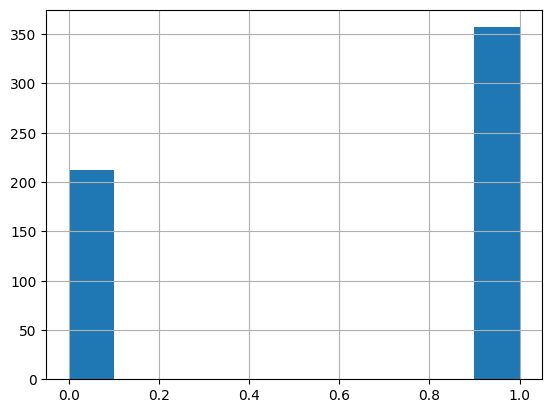

In [ ]:
df["diagnosis"].hist()

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


NameError: name 'X' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100

100.0

In [ ]:
dt.score(x_train,y_train)

1.0

In [ ]:
dt.score(x_test,y_test)

0.8947368421052632

Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
import numpy as np
df={
    'n_estimators': [100, 200, 300, 400, 500],  #Random Forest
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'splitter':['best', 'random'],
    'max_depth':[10, 20, 30, 40, 50],
    'min_samples_split':[1, 2, 3, 4, 5],
    'min_samples_leaf':[1, 2, 3, 7, 10]}

**GridSearchCV**

In [ ]:
grid=GridSearchCV(estimator=dt,param_grid=df,cv=5)
grid.fit(x_train,y_train)

NameError: name 'dt' is not defined

In [ ]:
grid.score(x_test,y_test)

0.9035087719298246

**RandomizedSearchCV**

In [ ]:
rand=RandomizedSearchCV(estimator=dt,param_distributions=df,cv=5,n_iter=10)
rand.fit(x_train,y_train)

c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 7, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
rand.score(x_test,y_test)

0.9210526315789473

bettter then GridSerach(90) or normal(76..)

**Cross Validation**

In [ ]:
from sklearn.model_selection import LeaveOneOut,LeavePOut,KFold,StratifiedGroupKFold

In [ ]:
lo=LeaveOneOut()


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100

100.0

In [ ]:
rf.score(x_test,y_test)

0.9385964912280702

Navie Bayes

In [ ]:
gb=GaussianNB()

In [ ]:
gb.fit(x_train, y_train)

GaussianNB()

In [ ]:
gb.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

In [ ]:
print(classification_report(y_test,gb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.91      0.96      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



# Logistic Regression

In [ ]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=
                        42,hypercube=False,class_sep=10)

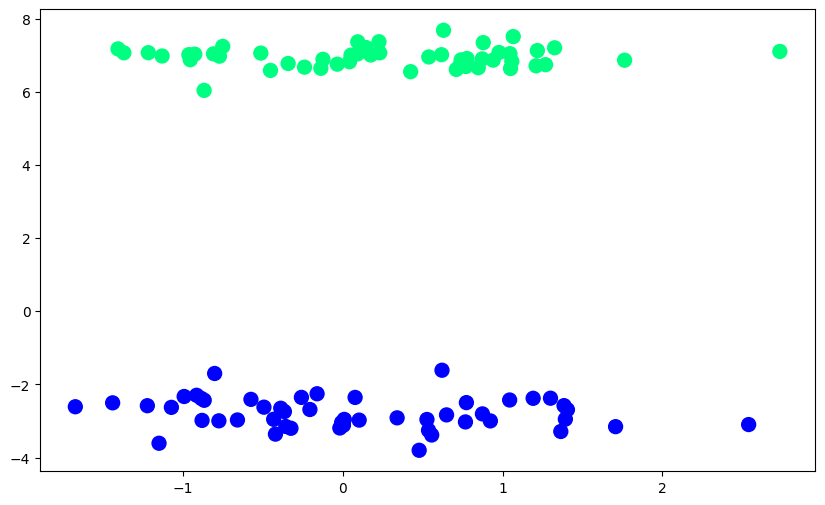

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1] ,c=y,cmap="winter",s=100)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model  import LogisticRegression
lor=LogisticRegression()

In [ ]:
lor.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lor.score(x_test,y_test)

1.0

In [ ]:
lor.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

<Axes: >

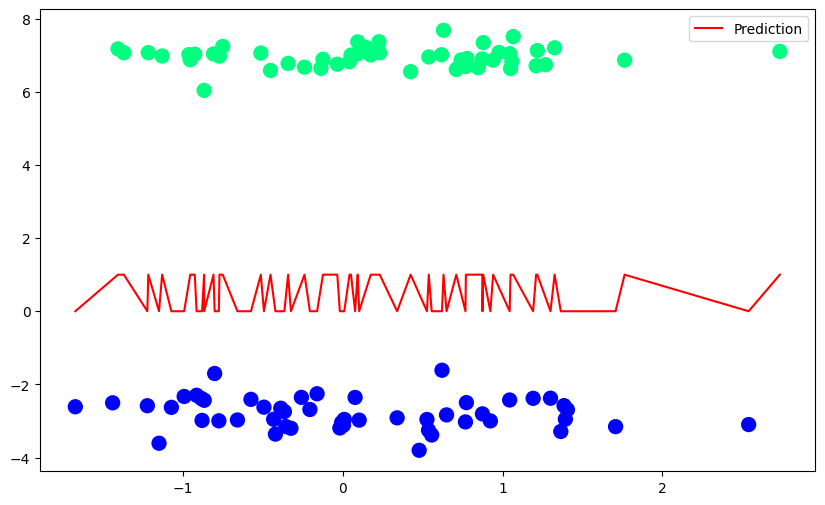

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y, cmap="winter", s=100)
sns.lineplot(x=x_test[:,0], y=lor.predict(x_test), label='Prediction', color='red')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
kn.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
sns.scatterplot(x_test[:,0],kn.predict(x_test))

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,kn.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        39

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
print(confusion_matrix(y_test,kn.predict(x_test)))

[[41  0]
 [ 0 39]]


SVM

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
X=df[['mean_radius', 'mean_texture']]
y=df['diagnosis']

In [ ]:
X

,mean_radius,mean_texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [ ]:
import matplotlib.pyplot as plt

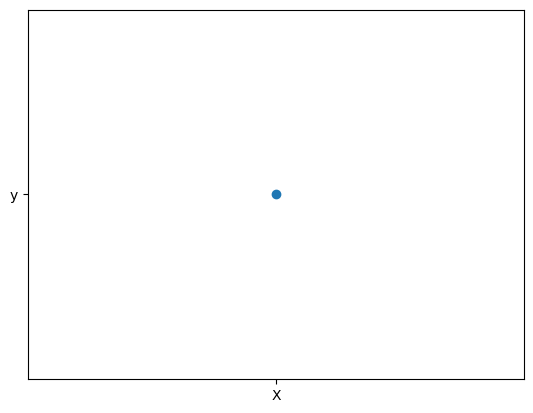

In [ ]:
plt.scatter(x="X",y="y",data=df)

In [ ]:
x_test,x_train,y_test,y_train=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler=staticmethod()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel="linear",random_state=0)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
svm.predict(x_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,svm.predict(x_test))

0.8835164835164835

Gaussian Kernel Radial Basis Function

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state = 0)
 # training set in x, y axis
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
classifier.predict(x_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
metrics.accuracy_score(y_test,classifier.predict(x_test))

0.8505494505494505

Sigmoid Kernel

In [ ]:
   
from sklearn.svm import SVC
classifier = SVC(kernel ='sigmoid')
classifier.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
classifier.predict(x_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
metrics.accuracy_score(y_test,classifier.predict(x_test))

0.8505494505494505